In [30]:
import tensorflow as tf

In [31]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [33]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wget
wget.download('https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip')

'signnames.csv'

In [ ]:
!unzip -q traffic-signs-data.zip -d data

tạo đường dẫn


In [35]:
train_link  = '/content/drive/MyDrive/ML/@data/train.p'
valid_link = '/content/drive/MyDrive/ML/@data/valid.p'
test_link = '/content/drive/MyDrive/ML/@data/test.p'

sd pickle doc file .p

In [36]:
import pickle

with open(train_link, mode='rb') as f:
    train = pickle.load(f)
with open(valid_link, mode='rb') as f:
    valid = pickle.load(f)
with open(test_link, mode='rb') as f:
    test = pickle.load(f)

In [37]:
#gan nhan
trainX, trainY = train['features'], train['labels']
validX, validY = valid['features'], valid['labels']
testX, testY = test['features'], test['labels']

In [38]:
#them label
classNames = {
0:	'Speed limit (20km/h)',
1:	'Speed limit (30km/h)',
2:	'Speed limit (50km/h)',
3:	'Speed limit (60km/h)',
4:	'Speed limit (70km/h)',
5:	'Speed limit (80km/h)',
6:	'End of speed limit (80km/h)',
7:	'Speed limit (100km/h)',
8:	'Speed limit (120km/h)',
9:	'No passing',
10:	'No passing for vehicles over 3.5 metric tons',
11:	'Right-of-way at the next intersection',
12:	'Priority road',
13:	'Yield',
14:	'Stop',
15:	'No vehicles',
16:	'Vehicles over 3.5 metric tons prohibited',
17:	'No entry',
18:	'General caution',
19:	'Dangerous curve to the left',
20:	'Dangerous curve to the right',
21:	'Double curve',
22:	'Bumpy road',
23:	'Slippery road',
24:	'Road narrows on the right',
25:	'Road work',
26:	'Traffic signals',
27:	'Pedestrians',
28:	'Children crossing',
29:	'Bicycles crossing',
30:	'Beware of ice/snow',
31:	'Wild animals crossing',
32:	'End of all speed and passing limits',
33:	'Turn right ahead',
34:	'Turn left ahead',
35:	'Ahead only',
36:	'Go straight or right',
37:	'Go straight or left',
38:	'Keep right',
39:	'Keep left',
40:	'Roundabout mandatory',
41:	'End of no passing',
42:	'End of no passing by vehicles over 3.5 metric tons'}

In [39]:
#ktra label
classNames[trainY[30]]

'End of no passing'

In [40]:
#tron anh va label
from sklearn.utils import shuffle
trainX, trainY = shuffle(trainX, trainY)

In [41]:
#chuan hoa phan tu, pixel 0->255=>/255, giam suc anh huong cua 255 va 1, khi chia 255 thi con 0->1, tranh thien vi gtri lon
trainX = trainX.astype("float")/255.0
validX = validX.astype("float")/255.0
testX = testX.astype("float")/255.0

In [42]:
#chuan hoa label thanh vector chang han vector 4, so 2 = [0,0,1,0]
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [43]:
#Xay dung mang NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [44]:
#Khoi tao model bang api Sequential
model = Sequential()

In [46]:
#dinh nghia anh voi kich thuoc 32x32x3
width = 32
height = 32
classes = 43 #43 output

#shape matran dau vao 32x32x3
shape = (width, height, 3)

Cấu trúc mạng NN dựa trên VGG16. VGG16 là cấu trúc sử dụng các lớp tích chập (convolution) để trích xuất đặc trưng của các lớp, giảm dần kích thước nhưng tăng channel. Sd convolution, relu, max pooling, fully connected, soft max

In [47]:
model.add(Conv2D(32,(3,3), padding="same", input_shape=shape))
model.add(Activation("relu"))#ham phi tuyen, ko thay doi shape input, ko can hoc (param = 0)
model.add(BatchNormalization())#sau relu, su phan bo data rat lon, can bacthnorm de chuan hoa phan bo sao cho tuong dong voi input ban dau
model.add(Conv2D(32,(3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))#gan giong convolution, maxpooling chi lay phan tu lon nhat ma kernel quet qua=> thu nho dau ra, ko can phai hoc
model.add(Conv2D(64,(3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) #de vao dc fully connected network, dau vao can la mot vector, hien thoi dang la ma tran nen ta can phai dung Flatten de duoi no ra thanh vector
model.add(Dense(512))#co dac lai dau vao, 4096->512
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(classes))
model.add(Activation("softmax"))#ra xac suat lop nao la lop cao nhat

In [48]:
#Tang cang data (xoay ngang doc cheo j j day de co nhieu tinh huong)
aug = ImageDataGenerator(rotation_range=0.36, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)


In [49]:
from scipy.optimize import optimize
#them learning_rate
learning_rate = 0.01

#mot epochs chay het data, nhung chay nhieu step/ chay mot phan data
epochs = 30
#batch_size la step
batch_size = 64

#optimize lossfunction bang thuat toan sgd, momentum la quan tinh khi chay
opt = SGD(learning_rate = learning_rate, momentum=0.9)

#compile model, su dung ham loss category... phu hop voi bai toan phan loai, phuong phap danh gia dua tren do chinh xac (accuracy)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"] )

In [50]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size= batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs= epochs, verbose=1)

Start training
Epoch 1/30


<ipython-input-50-6c8c8406346a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size= batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs= epochs, verbose=1)


543/543 [==============================] - 44s 53ms/step - loss: 2.0966 - accuracy: 0.3957 - val_loss: 1.9467 - val_accuracy: 0.4540
Epoch 2/30
543/543 [==============================] - 32s 60ms/step - loss: 0.8851 - accuracy: 0.7084 - val_loss: 1.2705 - val_accuracy: 0.6261
Epoch 3/30
543/543 [==============================] - 29s 53ms/step - loss: 0.4626 - accuracy: 0.8470 - val_loss: 1.0226 - val_accuracy: 0.7100
Epoch 4/30
543/543 [==============================] - 29s 53ms/step - loss: 0.2786 - accuracy: 0.9094 - val_loss: 0.8487 - val_accuracy: 0.7760
Epoch 5/30
543/543 [==============================] - 29s 54ms/step - loss: 0.1810 - accuracy: 0.9413 - val_loss: 0.7012 - val_accuracy: 0.8385
Epoch 6/30
543/543 [==============================] - 29s 54ms/step - loss: 0.1268 - accuracy: 0.9602 - val_loss: 0.5887 - val_accuracy: 0.8603
Epoch 7/30
543/543 [==============================] - 29s 54ms/step - loss: 0.1092 - accuracy: 0.9642 - val_loss: 0.5270 - val_accuracy: 0.8651
Epo

In [53]:
model.save("trained_model.h5")

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                      

In [65]:
load_model = tf.keras.models.load_model("/content/drive/MyDrive/ML/trained_model.h5")

1/1 [==============================] - 0s 22ms/step


'Keep right'

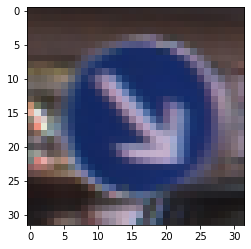

In [70]:
import numpy as np
import matplotlib.pyplot as plt
#thich cho i = nhieu thi cho
i = 2
result = load_model.predict(testX[i:i+1])
final_result = np.argmax(result)
#mapping classnames
final_result = classNames[final_result]

plt.imshow(test["features"][i])
final_result